In [30]:
import numpy as np
from scipy import special
import scipy
import matplotlib.pyplot as plt
import time
from scipy.optimize import minimize
from scipy.linalg import eigh

In [31]:
def exact_wavefunction(n,alpha):
    """
    Exact wavefunction, from 
    https://en.wikipedia.org/wiki/Quantum_harmonic_oscillator#Hamiltonian_and_energy_eigenstates
    modified for our notation.

    Parameters
    ----------
    n : int
        Order of the solution.
    alpha : float
        The HO parameter.

    Returns
    -------
    wf : function
        The exact wavefunction.

    """
    norm = 1/np.sqrt(2.**n * np.math.factorial(n))*(np.sqrt(alpha)/np.pi)**(1/4)
    herm = special.hermite(n)
    def wf(x):
        return norm*np.exp(-np.sqrt(alpha)*x**2/2)*herm(x)
    return wf

def exact_eigenvalue(n,alpha):
    """
    Exact eigenvalue $\lambda$ of the ODE
    
    $$ -f''(x) + alpha x^2f(x) = \lambda f(x) $$
    
    We assume throughout that $m = \hbar = 1$. Then, $\lambda$ is related to the
    energy as $\lambda = 2E$.

    Parameters
    ----------
    n : int
        Order of the solution.
    alpha : float
        The HO parameter.

    Returns
    -------
    float
        The eigenvalue.

    """
    
    return np.sqrt(alpha)*(n+0.5)

class FiniteDifferenceSolver:
    def __init__(self,alpha,regularGrid,h):
        self.alpha = alpha
        self.grid = regularGrid
        
        self.H = self.make_Hamiltonian_matrix()
        
    def make_kinetic_term(self):
        size = len(self.grid)
        offDiag = np.zeros(size)
        offDiag[1] = 1
        
        #Kinetic term
        H = -1*(-2*np.identity(size) + scipy.linalg.toeplitz(offDiag))/h**2
        return H
        
    def make_potential_term(self):
        H = np.diag(self.alpha*self.grid**2)
        return H
        
    def make_Hamiltonian_matrix(self):
        return self.make_kinetic_term() + self.make_potential_term()
    
    def solve(self):
        t0 = time.time()
        evals, evects = eigh(self.H,subset_by_index=[0,0])
        # evals, evects = np.linalg.eigh(self.H)
                    
        t1 = time.time()
        
        solveTime = t1 - t0
        return evals, evects, solveTime

In [32]:
h = 10**(-2) ### grid spacing for domain (Warning around 10**(-3) it starts to get slow).
### HO global parameters 
n = 0 # principle quantum number to solve in HO
# define the domain boundaries
xLims = [-10,10]
grid = np.arange(xLims[0],xLims[1]+h,h)
m = len(grid)
print('Number of grid points: ',m)
nRepeatsForTiming = 250

# Select alpha values to use to solve SE exactly.
alphaVals = [.5,2,5]

Number of grid points:  2001


In [33]:
class StandardRBM:
    def __init__(self,psiMat,kineticTerm,potentialTerm,judges=None):
        #potentialTerm should not be multiplied by alpha
        self.psiMat = psiMat
        if judges is None:
            self.judges = psiMat
        else:
            self.judges = judges
        self.kineticTerm = kineticTerm
        self.potentialTerm = potentialTerm
        self.matrixDim = psiMat.shape[0]
        
        self.kinProj, self.potProj = self.compute_projections()
        self.overlaps = self.compute_overlaps()
        
    def compute_projections(self):
        kinProj = np.zeros(2*(self.matrixDim,))
        potProj = np.zeros(2*(self.matrixDim,))
        for i in range(self.matrixDim):
            for j in range(i,self.matrixDim):
                kinProj[i,j] = self.judges[i] @ self.kineticTerm @ self.psiMat[j]
                kinProj[j,i] = kinProj[i,j]
                
                potProj[i,j] = self.judges[i] @ self.potentialTerm @ self.psiMat[j]
                potProj[j,i] = potProj[i,j]
        return kinProj, potProj
    
    def compute_overlaps(self):
        overlapMatrix = np.zeros(2*(self.matrixDim,))
        for i in range(self.matrixDim):
            for j in range(i,self.matrixDim):
                overlapMatrix[i,j] = self.judges[i] @ self.psiMat[j]
                overlapMatrix[j,i] = overlapMatrix[i,j]
        return overlapMatrix
        
    def solve(self,alpha):
        mat = self.kinProj + alpha*self.potProj
        print(len(mat))
            
        vals, vecs = eigh(mat,b=self.overlaps)
        
        a = vecs[:,0]
        
        wf = a @ self.psiMat
        wf /= np.linalg.norm(wf)
        
        return vals[0], wf, a

0
0
0
Finite Difference time: 5.123e-01 s
Finite Difference relative error: 3.423e-06
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
Standard RBM time: 1.393e-04 s
RBM relative error: 3.827e-03


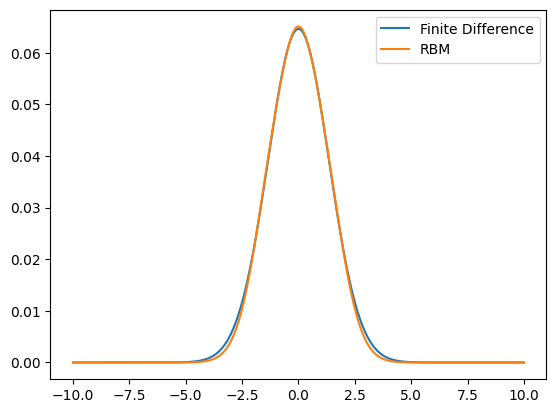

In [35]:
T = np.zeros((len(alphaVals),m)) 

#Getting high-fidelity solutions
for i,alpha in enumerate(alphaVals):
    fdSolver = FiniteDifferenceSolver(alpha,grid,h)
    evals, evecs, runTime = fdSolver.solve()
    kinTerm = fdSolver.make_kinetic_term()
    potTerm = fdSolver.make_potential_term()/alpha
    T[i] = evecs[:,n]
    print(n)

fig, ax = plt.subplots()

alphaTest = 0.3

exactEigenvalue = 2*exact_eigenvalue(n,alphaTest)

#Solving with finite difference
fdSol = FiniteDifferenceSolver(alphaTest,grid,h)
t0 = time.time()
evals, evecs, _ = fdSol.solve()
t1 = time.time()
print('Finite Difference time: %.3e s'%(t1-t0))

err = abs(((evals[0]-exactEigenvalue)/exactEigenvalue))
print('Finite Difference relative error: %.3e'%err)

ax.plot(grid,evecs[:,0],label='Finite Difference')

#Solving with RBM
rbm = StandardRBM(T,kinTerm,potTerm)
t0 = time.time()
for _ in range(nRepeatsForTiming):
    val, wf, a = rbm.solve(alphaTest)
t1 = time.time()

runTime = (t1-t0)/nRepeatsForTiming
print('Standard RBM time: %.3e s'%runTime)
print('RBM relative error: %.3e'%((val-exactEigenvalue)/exactEigenvalue))

ax.plot(grid,wf,label='RBM')

ax.legend()
